# Google Play Store Data
## Complete EDA Analysis from Beginer to Advance
### Data URL

# Import Libraries

In [1]:
print('Rehan')

Rehan


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wd
wd.filterwarnings('ignore')
%matplotlib inline 

In [3]:
df = pd.read_csv('./googleplaystore1.csv')
df.head()
# Set option rows and column max
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [4]:
print(f'The names of columns in this data set are as follows {df.columns}')
print(f'THe Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}')

The names of columns in this data set are as follows Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
THe Number of Rows are 10841, and columns are 13


In [11]:
# df['Size'].value_counts()
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
## Observations
---

In [12]:
df['Size'].isnull().sum()

0

In [13]:
# FInd values wth M
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [14]:
# Findvalues with K

df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [15]:
# Varies with device
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [16]:
#define a function and write
def conv_size (Size):
    if isinstance(Size, str):
        if 'k' in Size:
            return float(Size.replace('k','')) * 1024
        elif 'M' in Size:
            return float(Size.replace('M','')) * 1024 * 1024
        elif 'Varies with device' in Size:
            return np.nan
    return Size

In [20]:
# df['Size'] = df['Size'].apply(conv_size)
# df.rename(columns={'Size': 'Size_in_Bytes'}, inplace = True)
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
# Size in Mb'set
df['Size_in_Mb'] = df['Size_in_Bytes'].apply(lambda x : x/(1024*1024))
df['Size_in_Kb'] = df['Size_in_Bytes'].apply(lambda x : x/(1024))
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


## Take Care of Installs

In [32]:
# Installs remove , and + sign
# df['Installs'] = df['Installs'].apply(lambda x : x.replace('+','') if '+' in str(x) else x)
# df['Installs'] = df['Installs'].apply(lambda x : x.replace(',','') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
df.head()
df['Installs'].value_counts

<bound method IndexOpsMixin.value_counts of 0             10000
1            500000
2           5000000
3          50000000
4            100000
5             50000
6             50000
7           1000000
8           1000000
9             10000
10          1000000
11          1000000
12         10000000
13           100000
14           100000
15             5000
16           500000
17            10000
18          5000000
19         10000000
20           100000
21           100000
22           500000
23           100000
24            50000
25            10000
26           500000
27           100000
28            10000
29           100000
30           100000
31            50000
32           100000
33           100000
34            10000
35           100000
36           500000
37          5000000
38            10000
39           500000
40            10000
41           100000
42         10000000
43           100000
44            10000
45         10000000
46           100000
47           100

In [34]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Size_in_Mb,Size_in_Kb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000,102400.000000


In [ ]:
df['Price'].value_counts()

## Lets See how many cells has $ Sign

In [38]:
# Values that has $ Sign will be given with Backslash
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [39]:
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

10041

In [40]:
# replace $ sign with empty space
df['Price'] = df['Price'].apply(lambda x : x.replace('$','') if '$' in str(x) else x)
df['Price'] = df['Price'].apply(lambda x: float(x))
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Price,Size_in_Mb,Size_in_Kb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


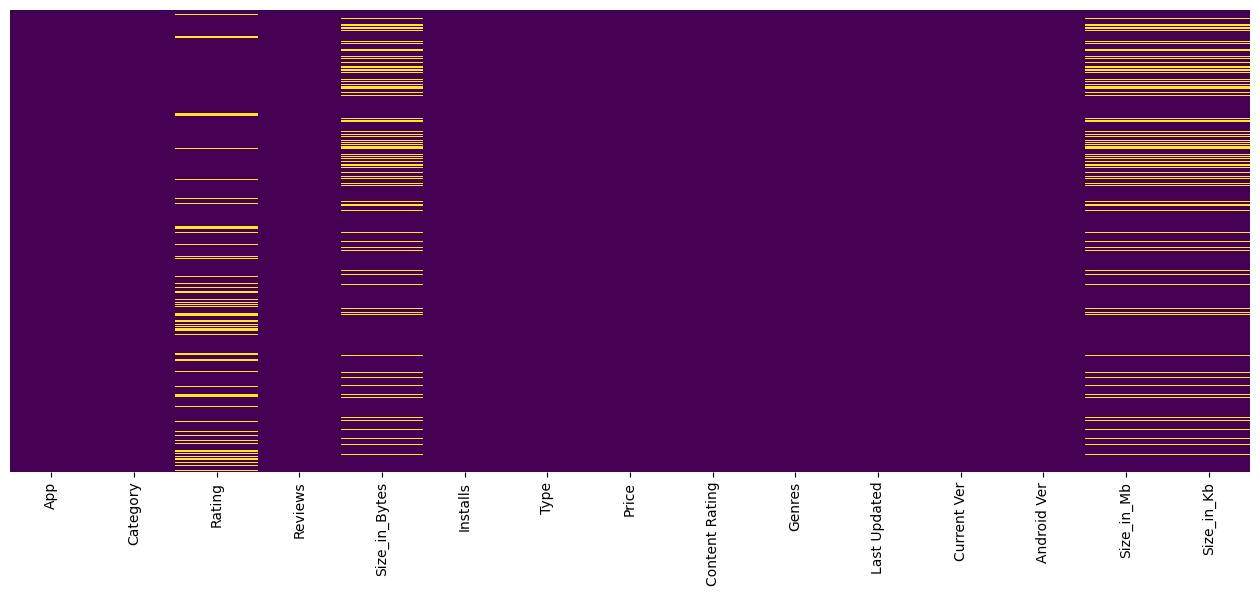

In [42]:
#plot missing values
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

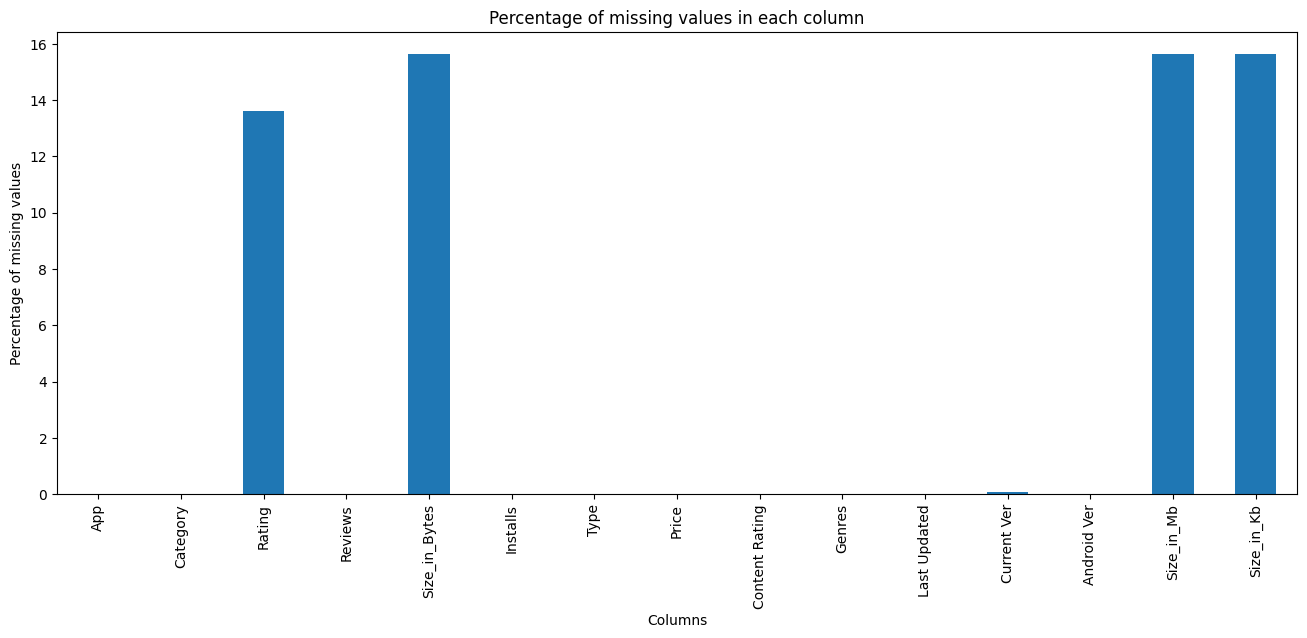

In [46]:
#plot missing values
plt.figure(figsize=(16,6))
# Plot ther null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add labels
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values in each column')
plt.show()
# sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# plt.show()

<Axes: >

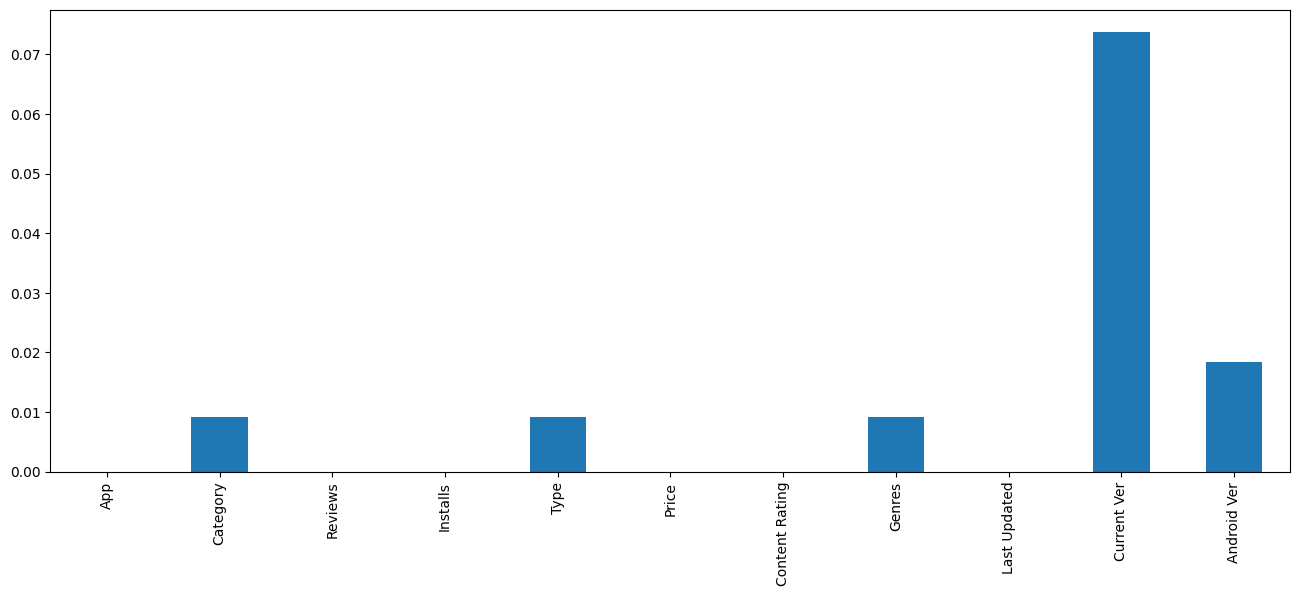

In [48]:
plt.figure(figsize=(16,6))
missing_percentage[missing_percentage < 1].plot(kind='bar')